In [1]:
#importing libraries and the corpus
import nltk
from nltk.corpus import gutenberg
import string
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#Importing the corpus
corp = gutenberg.words("carroll-alice.txt")

In [3]:
#Removing all non-alphabetic tokens and lowercasing all the tokens
corp = [word for word in corp if word.isalpha()]
corp = [word.lower() for word in corp]

In [4]:
#Displaying the frequency of words
from collections import Counter
ctr = Counter(corp)
ctr

Counter({'alice': 398,
         's': 201,
         'adventures': 7,
         'in': 369,
         'wonderland': 3,
         'by': 59,
         'lewis': 1,
         'carroll': 1,
         'chapter': 12,
         'i': 543,
         'down': 102,
         'the': 1642,
         'rabbit': 51,
         'hole': 5,
         'was': 357,
         'beginning': 14,
         'to': 729,
         'get': 46,
         'very': 144,
         'tired': 7,
         'of': 514,
         'sitting': 10,
         'her': 248,
         'sister': 9,
         'on': 193,
         'bank': 3,
         'and': 872,
         'having': 10,
         'nothing': 34,
         'do': 81,
         'once': 34,
         'or': 77,
         'twice': 5,
         'she': 553,
         'had': 178,
         'peeped': 3,
         'into': 67,
         'book': 11,
         'reading': 3,
         'but': 170,
         'it': 595,
         'no': 90,
         'pictures': 4,
         'conversations': 1,
         'what': 141,
         'is': 108,
    

In [5]:
#Print the number of words
no_of_words = len(corp)
print("Total Number of Words: "+str(no_of_words))

Total Number of Words: 27333


In [6]:
#Print the number of unique words
print("Number of unique words: "+str(len(set(corp))))

Number of unique words: 2569


In [7]:
#Finding the most common words in the corpus
m_com = ctr.most_common(25)

In [8]:
#Finding the most common words that start with c in the corpus
c_words = Counter([word for word in corp if word.startswith('c')]).most_common(25)

In [9]:
#Combining lists
for word in c_words:
    m_com.append(word) 

In [10]:
#Creating a sorted list of all the words in the corpus
temp = list(ctr.most_common())

In [11]:
#Finding the rank of every word in our most common words list
rank = [(temp.index(x)+1) for x in m_com]

In [12]:
#Finding the probability of every word in our most common words list
probs = [(x[1]/no_of_words) for x in m_com]

In [13]:
#Finding the product of the rank and the probability
r_p = []
for i in range(50):
    r_p.append(rank[i]*probs[i])

In [14]:
#Creating a dataframe to show results
freq = []
words = []
for i in range(50):
    words.append(m_com[i][0])
    freq.append(m_com[i][1])
temp = {"Word": words, "Frequency": freq, "Rank": rank, "Probability": probs, "Product":r_p}
result = pd.DataFrame(temp)

In [15]:
#Displaying results
result

,Word,Frequency,Rank,Probability,Product
0,the,1642,1,0.060074,0.060074
1,and,872,2,0.031903,0.063806
2,to,729,3,0.026671,0.080013
3,a,632,4,0.023122,0.092489
4,it,595,5,0.021769,0.108843
5,she,553,6,0.020232,0.121392
6,i,543,7,0.019866,0.139063
7,of,514,8,0.018805,0.150441
8,said,462,9,0.016903,0.152124
9,you,411,10,0.015037,0.150368


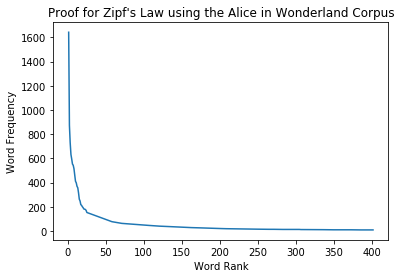

In [16]:
#Plotting the output
plt.plot(rank, freq)
plt.title("Proof for Zipf's Law using the Alice in Wonderland Corpus")
plt.xlabel("Word Rank")
plt.ylabel("Word Frequency")
plt.show()

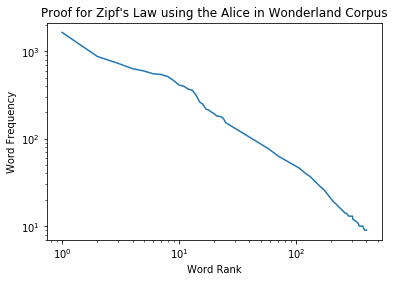

In [17]:
#Plotting the output in log scale
plt.plot(rank, freq)
plt.title("Proof for Zipf's Law using the Alice in Wonderland Corpus")
plt.xlabel("Word Rank")
plt.xscale("log")
plt.ylabel("Word Frequency")
plt.yscale("log")
plt.show()

From the above data and plots we can clearly see that word frequency is inversely proportional to word rank. For example, the most common word (rank 1) in the corpus, "the", makes up for 6% of the entire corpus. "The" occurs approximately twice as often as the next most frequent word, "and", and thrice as often as the third most common word "to".